In [1]:
# YOUR CODE HERE
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [6]:
url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
books_html = soup.find_all("article", class_='product_pod')
books_html

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

## Parsing _one_ book

In [7]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [14]:
book_title = books_html[0].find('h3').find('a').attrs['title']
print(book_title)

A Light in the Attic


In [23]:
book_price = float(books_html[0].find('p', class_='price_color').text.split('£')[1])
print(book_price)

51.77


In [24]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [25]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [29]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    if 'Five' in rating_classes:
        return 5
    elif 'Four' in rating_classes:
        return 4
    elif 'Three' in rating_classes:
        return 3
    elif 'Two' in rating_classes:
        return 2    
    return 1

In [30]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
print(book_rating)

3


## Parsing _all_ books

In [34]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

for book in books_html:
    books_dict['Title'].append(book.find('h3').find('a').attrs['title'])
    books_dict['Price'].append(float(book.find('p', class_='price_color').text.split('£')[1]))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))

In [37]:
len(books_dict['Title'])

20

## Loading Data into Pandas

In [38]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

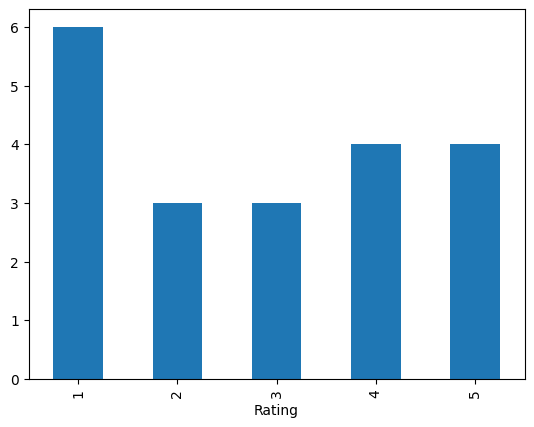

In [43]:
books_df.groupby('Rating').count()['Title'].plot(kind='bar')

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/pp085ster/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/pp085ster/code/pablopussell/02-Data-Toolkit/02-Data-Sourcing/data-book_scraping/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git pus

## Going through all the pages of the catalogue

In [51]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    books_html = soup.find_all("article", class_='product_pod')
    for book in books_html:
            all_books_dict['Title'].append(book.find('h3').find('a').attrs['title'])
            all_books_dict['Price'].append(float(book.find('p', class_='price_color').text.split('£')[1]))
            all_books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
            
all_books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'In Her Wake',
  'How Music Works',
  'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Smal

In [52]:
len(all_books_dict["Title"])

60

In [53]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
55,The Torch Is Passed: A Harding Family Story,19.09,1
56,The Secret of Dreadwillow Carse,56.13,1
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1
58,The Past Never Ends,56.50,4
59,The Natural History of Us (The Fine Art of Pre...,45.22,3


<AxesSubplot:>

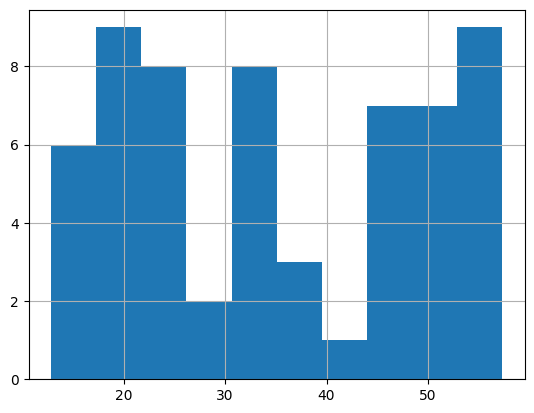

In [54]:
all_books_df["Price"].hist()